In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=100
sns.set_style('darkgrid')

###  Load the dataset

In [2]:
df=pd.read_excel("Airlines+Data.xlsx")

In [3]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


### EDA

In [4]:
df['Passengers'].isnull().sum()

0

In [5]:
# plot line chart for look seasonal pattern or trend

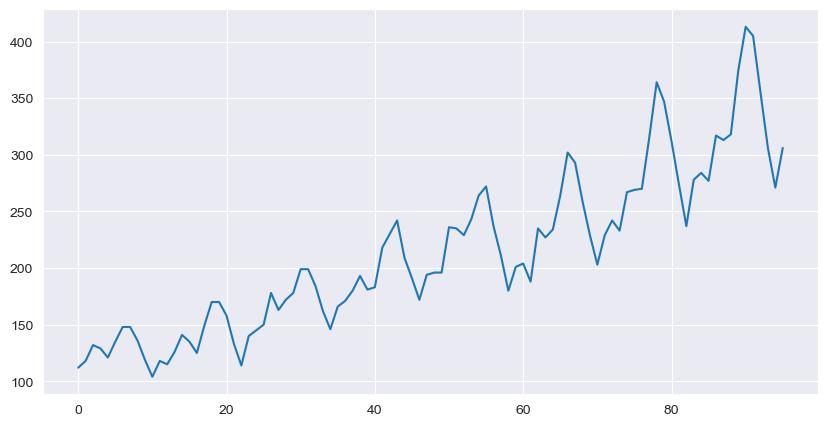

In [6]:
plt.plot(df['Passengers'])

In [7]:
# so this is the linear trend data with multiplicative seasonality 
# and also this is non stationary data

#### Convert non-stationary data into stationary

In [8]:
# First order difference

In [9]:
df['First-order']=df['Passengers'].diff(periods=1)
df

,Month,Passengers,First-order
0,1995-01-01,112,NaN
1,1995-02-01,118,6.0
2,1995-03-01,132,14.0
3,1995-04-01,129,-3.0
4,1995-05-01,121,-8.0
...,...,...,...
91,2002-08-01,405,-8.0
92,2002-09-01,355,-50.0
93,2002-10-01,306,-49.0
94,2002-11-01,271,-35.0


In [10]:
# drop na value

In [11]:
df.dropna(inplace=True)

In [12]:
# checking weather non stationary data convert into stationary data or not,plot line chart

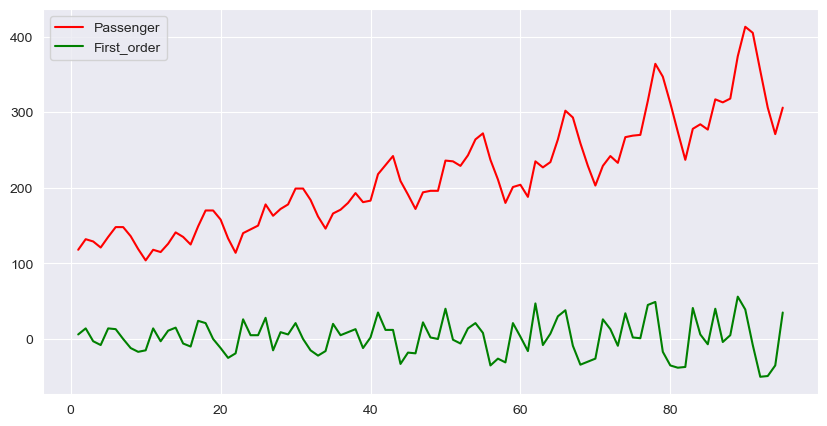

In [13]:
plt.plot(df['Passengers'],color='red',label='Passenger')
plt.plot(df['First-order'],color='green',label='First_order')
plt.legend()
plt.show()

In [14]:
# so the data is converted into stationary format

###  Calculate Autocorrelation

In [15]:
acf_value=acf(df['First-order'])
acf_value

array([ 1.        ,  0.24719303, -0.15621114, -0.19389898, -0.30091356,
       -0.07659995,  0.04937987, -0.11186081, -0.28940231, -0.12796419,
       -0.14189709,  0.23091956,  0.76784132,  0.2018499 , -0.14879414,
       -0.13854633, -0.23255484, -0.03403639,  0.00806283, -0.09009974])

In [16]:
# plot ACF

In [ ]:
plot_acf(df['First-order'],lags=30)
plt.show()

In [ ]:
# Partial Autocorrelation Function

In [ ]:
pacf_val=pacf(df['First-order'])
pacf_val

In [ ]:
# plot pacf

In [ ]:
plot_pacf(df['First-order'],lags=30)
plt.show()

In [ ]:
# so according to the acf and pacf graph the 12th lag variable is affecting the current column 

#### Transforming the data

In [ ]:
df['log_passenger']=np.log(df['Passengers'])

In [ ]:
df.head()

In [ ]:
plt.subplot(1,2,1)
df['Passengers'].hist()
plt.subplot(1,2,2)
df['log_passenger'].hist()

In [ ]:
# so after log transformation the data is converted into nearly distibuted

### Moving Average

In [ ]:
# Moving Average
plt.figure(figsize=(12,4))
df['Passengers'].plot()
df['Passengers'].rolling(10).mean().plot


for i in range(2,24,6):
    df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend()

#### Extracting the day , month and year from the Month column

In [ ]:
df['month']=df.Month.dt.strftime('%b')
df['year']=df.Month.dt.strftime('%y')

In [ ]:
import datetime

df['m'] = range(1,(df.shape[0]+1))
df['m_square'] = np.power(df['m'],2)
df['log_Passengers']=np.log(df['Passengers'])
df.head()

In [ ]:
ddf = pd.get_dummies(df.iloc[:,3],columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ddf.head()

In [ ]:
# concatinating both the dataset

In [ ]:
df=pd.concat([df,ddf],axis=1)
df.head()

In [ ]:
col = ['Month', 'Passengers', 'month', 'm', 'm_square', 'year','log_Passengers', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df1 = pd.DataFrame(df,columns=col)
df1.head()

###  Splitting The Data

In [ ]:
train = df1.head(70)
test = df1.tail(10)

### Applying the different forecasting model 

#### 1.Linear Model

In [ ]:
linear_model=smf.ols('Passengers~m',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['m'])))
rmse_linear=np.sqrt(mean_squared_error(test['Passengers'],pred_linear))
rmse_linear

#### 2.Exponential Model

In [ ]:
exp=smf.ols('log_Passengers~m',data=train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(test['m'])))
rmse_exp=np.sqrt(mean_squared_error(test['Passengers'],pred_exp))
rmse_exp

#### 3.Quadratic Model

In [ ]:
quad=smf.ols('Passengers~m+m_square',data=train).fit()
pred_quad=pd.Series(quad.predict(pd.DataFrame(test[['m','m_square']])))
rmse_quad=np.sqrt(mean_squared_error(test['Passengers'],pred_quad))
rmse_quad

#### 4.Additive Seasonality

In [ ]:
add_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))

rmse_add_sea=np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea))
rmse_add_sea

#### 5.Additive Seasonality with quadratic Trend

In [ ]:
add_sea_que=smf.ols('Passengers~m+m_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_que=pd.Series(add_sea_que.predict(test[['m','m_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_que=np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea_que))
rmse_add_sea_que

#### 6.Multiplicative Seasonality

In [ ]:
mul_sea=smf.ols('log_Passengers~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mult_sea=pd.Series(mul_sea.predict(test[['m','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mult_sea=np.sqrt(mean_squared_error(test['Passengers'],pred_mult_sea))
rmse_mult_sea

#### Comparing all the models

In [ ]:
# compare the results of all models

data={'MODEL':pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_add_sea_que','rmse_mult_sea']),
     'RMSE_values':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_que,rmse_mult_sea])
     }

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_values'])

#### Conclusion: so the additive seasonality with quadratic trend model gives the least rmse value that is 47